In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
import scipy.stats as st

In [6]:
#read in sales and price
history_raw = pd.read_csv("C:/Users/sharo/test_project/Project Test/ProjectOmega-Annual.csv")
history_raw.head()

,Symbol,Name,SEDOL,FDS Ticker Symbol,GICS Sector Name,Net Sales,Net Sales.1,Net Sales.2,Net Sales.3,Net Sales.4,...,Market Value,Market Value.1,Market Value.2,Market Value.3,Market Value.4,Market Value.5,Market Value.6,Market Value.7,Market Value.8,Market Value.9
0,MMM,3M Company,2595708,MMM-US,Industrials,-0.02,0.04,0.05,-0.01,-0.05,...,-0.08,-0.22,0.31,0.16,-0.12,0.12,0.46,0.12,-0.08,0.05
1,AOS,A. O. Smith Corporation,2816023,AOS-US,Industrials,-0.06,0.06,0.12,0.06,0.08,...,0.08,-0.32,0.28,0.22,0.34,0.02,0.69,0.59,0.05,0.33
2,ABT,Abbott Laboratories,2002305,ABT-US,Health Care,0.04,0.12,0.31,0.02,0.01,...,0.21,0.28,0.76,-0.14,-0.03,0.14,-0.43,0.17,0.19,-0.12
3,ABMD,"ABIOMED, Inc.",2003698,ABMD-US,Health Care,0.30,0.33,0.35,0.43,0.25,...,0.00,1.36,0.35,0.36,1.85,0.44,-0.17,0.59,0.42,1.15
4,ACN,Accenture Plc Class A,B4BNMY3,ACN-US,Information Technology,0.05,0.11,0.06,0.06,0.03,...,0.17,0.34,0.13,0.21,0.16,0.11,0.18,0.14,0.50,0.11


## Market Value Growth Rate

In [12]:
#MV Growth only
MV_growth_raw = history_raw.drop(columns = history_raw.iloc[:,5:25].columns.tolist())
MV_growth_raw.head()

,Symbol,Name,SEDOL,FDS Ticker Symbol,GICS Sector Name,Market Value,Market Value.1,Market Value.2,Market Value.3,Market Value.4,Market Value.5,Market Value.6,Market Value.7,Market Value.8,Market Value.9
0,MMM,3M Company,2595708,MMM-US,Industrials,-0.08,-0.22,0.31,0.16,-0.12,0.12,0.46,0.12,-0.08,0.05
1,AOS,A. O. Smith Corporation,2816023,AOS-US,Industrials,0.08,-0.32,0.28,0.22,0.34,0.02,0.69,0.59,0.05,0.33
2,ABT,Abbott Laboratories,2002305,ABT-US,Health Care,0.21,0.28,0.76,-0.14,-0.03,0.14,-0.43,0.17,0.19,-0.12
3,ABMD,"ABIOMED, Inc.",2003698,ABMD-US,Health Care,0.00,1.36,0.35,0.36,1.85,0.44,-0.17,0.59,0.42,1.15
4,ACN,Accenture Plc Class A,B4BNMY3,ACN-US,Information Technology,0.17,0.34,0.13,0.21,0.16,0.11,0.18,0.14,0.50,0.11


## Sales Growth Rate

In [11]:
sales_growth_raw = history_raw.iloc[:,0:15]
sales_growth_raw.head()

,Symbol,Name,SEDOL,FDS Ticker Symbol,GICS Sector Name,Net Sales,Net Sales.1,Net Sales.2,Net Sales.3,Net Sales.4,Net Sales.5,Net Sales.6,Net Sales.7,Net Sales.8,Net Sales.9
0,MMM,3M Company,2595708,MMM-US,Industrials,-0.02,0.04,0.05,-0.01,-0.05,0.03,0.03,0.01,0.11,0.15
1,AOS,A. O. Smith Corporation,2816023,AOS-US,Industrials,-0.06,0.06,0.12,0.06,0.08,0.09,0.11,0.13,0.15,-0.25
2,ABT,Abbott Laboratories,2002305,ABT-US,Health Care,0.04,0.12,0.31,0.02,0.01,0.03,-0.09,-0.45,0.10,0.14
3,ABMD,"ABIOMED, Inc.",2003698,ABMD-US,Health Care,0.30,0.33,0.35,0.43,0.25,0.16,0.25,0.25,0.18,0.17
4,ACN,Accenture Plc Class A,B4BNMY3,ACN-US,Information Technology,0.05,0.11,0.06,0.06,0.03,0.05,0.02,0.09,0.18,0.00


## Aggregate Plot for sales growth rate vs MV growth rate

The correlation between both factors is 0.19


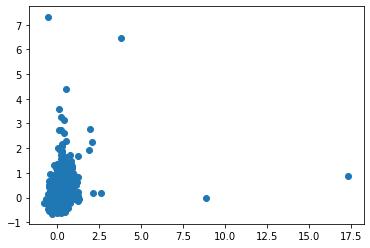

In [13]:
#scatter plot -- sales growth vs MV growth (all data)
sales_growth_table = sales_growth_raw.iloc[:,5:len(sales_growth_raw)]
sales_growth_series = pd.Series(sales_growth_table.values.ravel('F'))
sales_growth_df = sales_growth_series.to_frame()
sales_growth_df.columns = ["Sales Growth"]

MV_growth_table = MV_growth_raw.iloc[:,5:len(MV_growth_raw)]
MV_growth_series = pd.Series(MV_growth_table.values.ravel('F'))
MV_growth_df = MV_growth_series.to_frame()
MV_growth_df.columns = ["MV Growth"]

scatter_pair = pd.merge(sales_growth_df, MV_growth_df, left_index = True, right_index = True, how = "outer")
scatter_pair

plt.scatter(scatter_pair["Sales Growth"], scatter_pair["MV Growth"])
correlation = st.pearsonr(scatter_pair["Sales Growth"],scatter_pair["MV Growth"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

Confirm whether below is reasonable - remove outlier -- based on independent variable

The correlation between both factors is 0.17


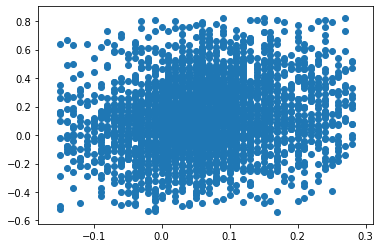

In [14]:
#scatter Plot -- 
#remove outlier (sales growth) for independent variable
quartiles = scatter_pair["Sales Growth"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
scatter_pair["Outlier"] = np.where((scatter_pair["Sales Growth"]<lower_bound) | (scatter_pair["Sales Growth"]>upper_bound), 'yes', 'no')


#remove outlier (MV growth) for Dependent variable
quartiles_y = scatter_pair["MV Growth"].quantile([0.25,0.5,0.75])
lowerq_y = quartiles_y[0.25]
upperq_y = quartiles_y[0.75]
iqr_y = upperq_y - lowerq_y
upper_bound_y = upperq_y + 1.5*iqr_y
lower_bound_y = lowerq_y - 1.5*iqr_y
scatter_pair["Outlier_y"] = np.where((scatter_pair["MV Growth"]<lower_bound_y) | (scatter_pair["MV Growth"]>upper_bound_y), 'yes', 'no')

scatter_raw_pre = scatter_pair[scatter_pair["Outlier"] != "yes"]
scatter_raw = scatter_raw_pre[scatter_raw_pre["Outlier_y"] != "yes"]
scatter_raw

plt.scatter(scatter_raw["Sales Growth"], scatter_raw["MV Growth"])
correlation = st.pearsonr(scatter_raw["Sales Growth"],scatter_raw["MV Growth"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

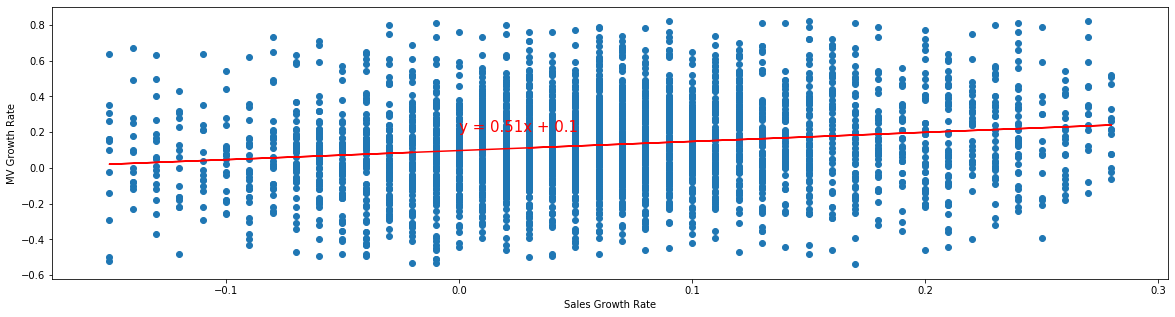

The correlation between both factors is 0.17


In [21]:
# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(scatter_raw["Sales Growth"], scatter_raw["MV Growth"])
regress_values = scatter_raw["Sales Growth"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize = (20,5))
plt.scatter(scatter_raw["Sales Growth"],scatter_raw["MV Growth"])
plt.plot(scatter_raw["Sales Growth"],regress_values,"r-")
plt.annotate(line_eq,(0,0.2),fontsize=15,color="red")
plt.xlabel('Sales Growth Rate')
plt.ylabel('MV Growth Rate')
plt.show()
correlation = st.pearsonr(scatter_raw["Sales Growth"],scatter_raw["MV Growth"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

## T-test - Independent ttest on Sales Growth vs Market Value Growth

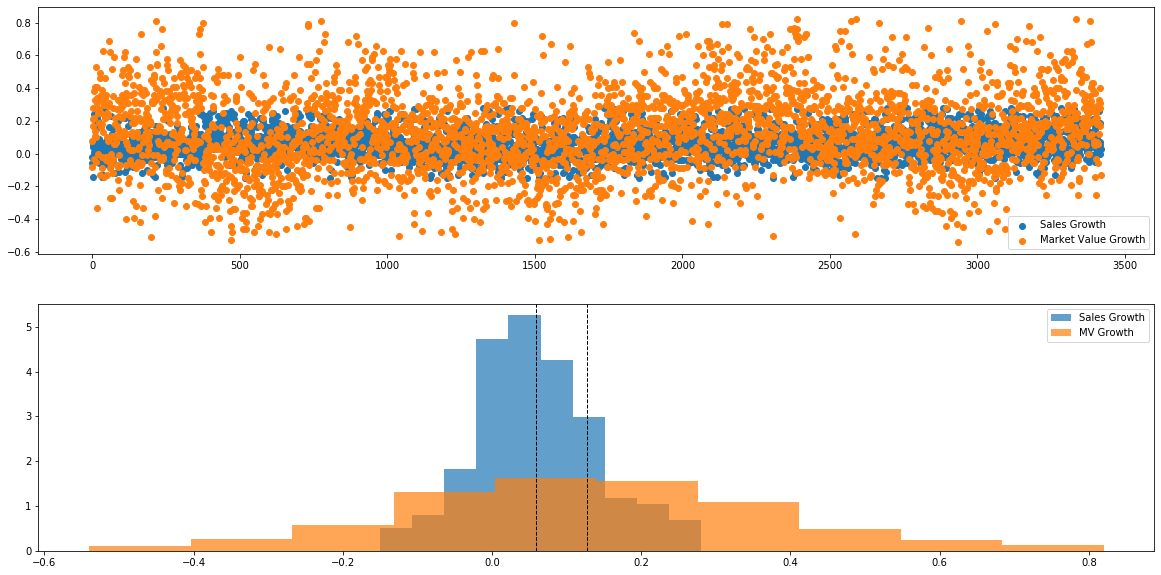

In [22]:
# Scatter Plot of Data
plt.figure(figsize = (20,10))
plt.subplot(2, 1, 1)
plt.scatter(range(len(scatter_raw["Sales Growth"])), scatter_raw["Sales Growth"], label="Sales Growth")
plt.scatter(range(len(scatter_raw["MV Growth"])), scatter_raw["MV Growth"], label="Market Value Growth")
plt.legend()

# Histogram Plot of Data
plt.subplot(2, 1, 2)
plt.hist(scatter_raw["Sales Growth"], 10, density=True, alpha=0.7, label="Sales Growth")
plt.hist(scatter_raw["MV Growth"], 10, density=True, alpha=0.7, label="MV Growth")
plt.axvline(scatter_raw["Sales Growth"].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(scatter_raw["MV Growth"].mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()  

In [23]:
scatter_raw["Sales Growth"].std()

0.08177237731278585

In [24]:
scatter_raw["MV Growth"].std()

0.24001831572524393

In [25]:
st.ttest_ind(scatter_raw["Sales Growth"], scatter_raw["MV Growth"], equal_var=False)

Ttest_indResult(statistic=-15.737317101719936, pvalue=2.896757976942468e-54)

In [26]:
#P-value means the sales growth is not equivalent to MV growth; which mean we can't estimate/predicate MV grwoth by sales growth

## By Sector - All Data Including Outliers

The correlation between both factors for Information Technology is 0.24
The correlation between both factors for Consumer Discretionary is 0.35
The correlation between both factors for Communication Services is 0.71
The correlation between both factors for Financials is 0.22
The correlation between both factors for Health Care is 0.13
The correlation between both factors for Consumer Staples is 0.21
The correlation between both factors for Energy is 0.28
The correlation between both factors for Utilities is 0.26
The correlation between both factors for Real Estate is 0.29
The correlation between both factors for Industrials is 0.21
The correlation between both factors for Materials is 0.28


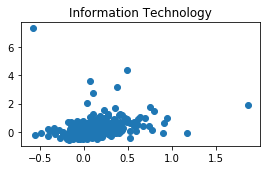

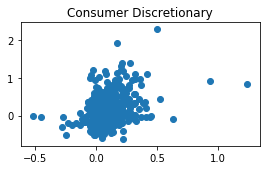

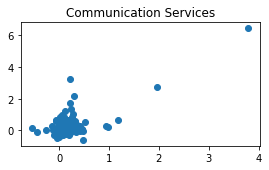

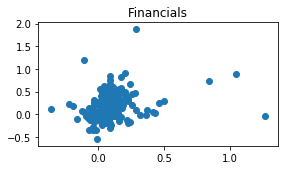

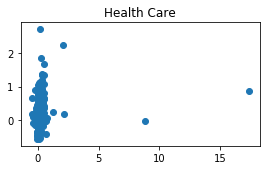

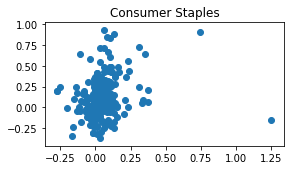

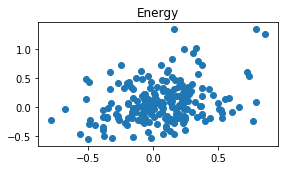

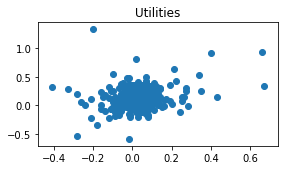

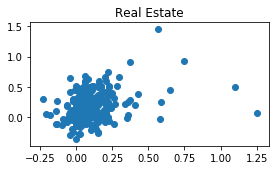

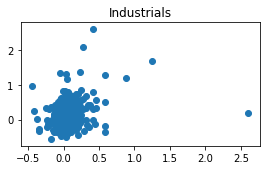

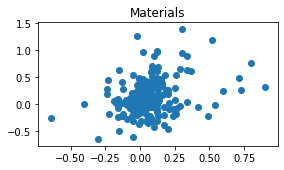

In [27]:
sector_list = ["Information Technology", "Consumer Discretionary", "Communication Services", "Financials", "Health Care",
              "Consumer Staples", "Energy","Utilities","Real Estate","Industrials","Materials"]
for i in range(len(sector_list)):
    sector_sales_growth_raw = sales_growth_raw[sales_growth_raw["GICS Sector Name"] == sector_list[i]]
    sector_MV_growth_raw = MV_growth_raw[MV_growth_raw["GICS Sector Name"] == sector_list[i]]
    #display(sector_sales_growth_raw)
    
    
    sector_sales_growth_table = sector_sales_growth_raw.iloc[:,5:len(sales_growth_raw)]
    sector_sales_growth_series = pd.Series(sector_sales_growth_table.values.ravel('F'))
    sector_sales_growth_df = sector_sales_growth_series.to_frame()
    sector_sales_growth_df.columns = ["Sales Growth"]
    #display(sector_sales_growth_df)

    sector_MV_growth_table = sector_MV_growth_raw.iloc[:,5:len(MV_growth_raw)]
    sector_MV_growth_series = pd.Series(sector_MV_growth_table.values.ravel('F'))
    sector_MV_growth_df = sector_MV_growth_series.to_frame()
    sector_MV_growth_df.columns = ["MV Growth"]
    #display(sector_MV_growth_df)
    
    sector_scatter_pair = pd.merge(sector_sales_growth_df, sector_MV_growth_df, left_index = True, right_index = True, how = "outer")
    #display(sector_scatter_pair)
    
    plt.figure(figsize=(30,5))
    plt.subplot(2, 6, i+1)
    plt.scatter(sector_scatter_pair["Sales Growth"], sector_scatter_pair["MV Growth"])
    plt.title(sector_list[i])
    sector_correlation = st.pearsonr(sector_scatter_pair["Sales Growth"],sector_scatter_pair["MV Growth"])
    print(f"The correlation between both factors for {sector_list[i]} is {round(sector_correlation[0],2)}")
    
    
    